<a href="https://colab.research.google.com/github/qnrua0511/kaggle_study/blob/main/House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices _ Advanced Regression Techniques
[주택 가격 예측 문제](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)



## 데이터 불러오기

In [7]:
!pip install kaggle

In [8]:
from google.colab import files
files.upload()  # kaggle.json 파일 업로드

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bookkk","key":"662b1e17858f4952a9181db192ad7491"}'}

In [9]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle competitions list

ref                                                                                     deadline             category                reward  teamCount  userHasEntered  
--------------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/arc-prize-2024                                      2024-11-10 23:59:00  Featured         1,100,000 Usd        955           False  
https://www.kaggle.com/competitions/eedi-mining-misconceptions-in-mathematics           2024-12-12 23:59:00  Featured            55,000 Usd         31           False  
https://www.kaggle.com/competitions/rsna-2024-lumbar-spine-degenerative-classification  2024-10-08 23:59:00  Featured            50,000 Usd       1482           False  
https://www.kaggle.com/competitions/ariel-data-challenge-2024                           2024-10-31 23:59:00  Featured            50,000 Usd        617     

In [11]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [129]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Data Loading is done!')

Data Loading is done!


## 데이터 둘러보기

In [130]:
print("The shape of Train Data is:", train.shape)
print("The shape of Test Data is:", test.shape)

The shape of Train Data is: (1460, 81)
The shape of Test Data is: (1459, 80)


In [131]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [132]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## 피처 엔지니어링

### 이상치 제거

In [133]:
# OverallQual : 재료와 마감재 평가
# OverallCond : 집안의 전체적인 성능 평가
train.drop(train[(train['OverallQual']<4) & (train['SalePrice']> 200000)].index, inplace=True)
train.drop(train[(train['OverallCond']<4) & (train['SalePrice']> 200000)].index, inplace=True)
train.reset_index(drop=True, inplace=True)
print(train.shape)

(1458, 81)


### 종속 변수의 로그 변환

seaborn의 histoplot을 사용하여 SalePrice 확인

The value of mu before log transformation is: 180761.24142661178
The value of sigma before log transformation is: 79270.93617295024


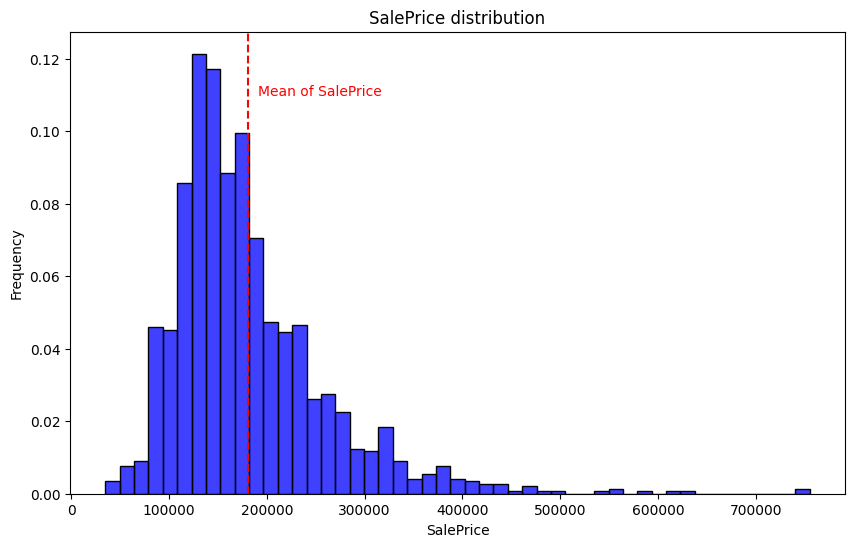

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

(mu, sigma) = norm.fit(train['SalePrice'])
print("The value of mu before log transformation is:", mu)
print("The value of sigma before log transformation is:", sigma)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(train['SalePrice'], color="b", stat="probability")
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")

plt.axvline(mu, color='r', linestyle='--')
plt.text(mu + 10000, 0.11, 'Mean of SalePrice', rotation=0, color='r')
fig.show()

그래프를 보아 주택가격이 정규분포를 이루지 않는 것을 알 수 있음

일반적인 선형 회귀는 정규 분포를 만족해야하여 np.log1p를 활용하여 변환처리함

The value of mu before log transformation is: 12.0233397799989
The value of sigma before log transformation is: 0.3989191793099824


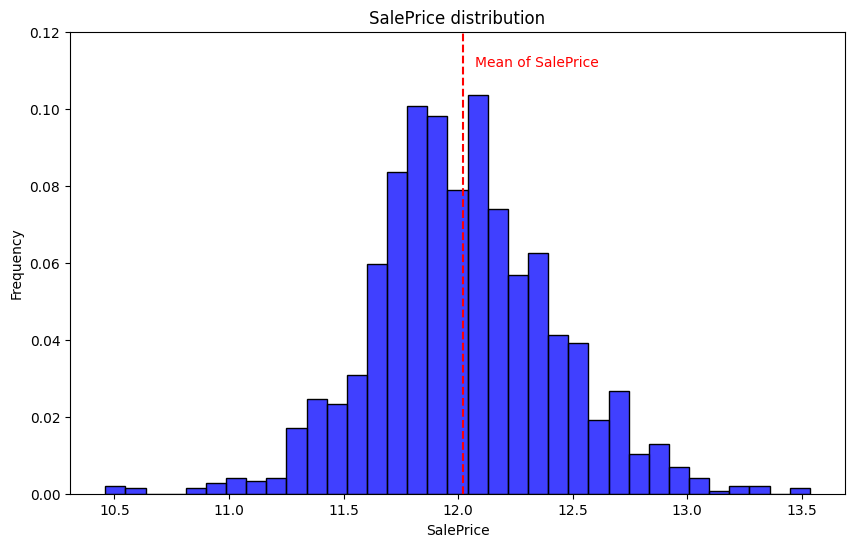

In [135]:
import numpy as np

train["SalePrice"] = np.log1p(train["SalePrice"])

(mu, sigma) = norm.fit(train['SalePrice'])
print("The value of mu before log transformation is:", mu)
print("The value of sigma before log transformation is:", sigma)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(train['SalePrice'], color="b", stat="probability")
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")

plt.axvline(mu, color='r', linestyle='--')
plt.text(mu + 0.05, 0.111, 'Mean of SalePrice', rotation=0, color='r')
plt.ylim(0, 0.12)
fig.show()

### 데이터 합치기

In [136]:
#Id 객체는 별도로 저장한 후 제거
train_ID = train['Id']
test_ID = test['Id']
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)
train.shape, test.shape

((1458, 80), (1459, 79))

In [137]:
#SalePrice 변수도 별도로 저장후 제거
y = train['SalePrice'].reset_index(drop=True)
train = train.drop('SalePrice', axis = 1)
train.shape, test.shape, y.shape

((1458, 79), (1459, 79), (1458,))

변수의 개수가 동일한 것을 확인 할 수 있으니 데이터를 합침

In [138]:
all_df = pd.concat([train, test]).reset_index(drop=True)
all_df.shape

(2917, 79)

### 결측치처리

In [139]:
def check_na(data, head_num = 6):
  isnull_na = (data.isnull().sum() / len(data)) * 100
  data_na = isnull_na.drop(isnull_na[isnull_na == 0].index).sort_values(ascending=False)
  missing_data = pd.DataFrame({'Missing Ratio' :data_na,
                               'Data Type': data.dtypes[data_na.index]})
  print("결측치 데이터 컬럼과 건수:\n", missing_data.head(head_num))

check_na(all_df, 20)

결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
PoolQC            99.657182    object
MiscFeature       96.400411    object
Alley             93.212204    object
Fence             80.425094    object
MasVnrType        60.507371    object
FireplaceQu       48.680151    object
LotFrontage       16.626671   float64
GarageFinish       5.450806    object
GarageQual         5.450806    object
GarageCond         5.450806    object
GarageYrBlt        5.450806   float64
GarageType         5.382242    object
BsmtExposure       2.811107    object
BsmtCond           2.811107    object
BsmtQual           2.776826    object
BsmtFinType2       2.742544    object
BsmtFinType1       2.708262    object
MasVnrArea         0.754200   float64
MSZoning           0.137127    object
BsmtFullBath       0.068564   float64


결측치 비율이 높은 상위 7개 변수 제거

In [140]:
all_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu','LotFrontage'], axis=1, inplace=True)
check_na(all_df)

결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
GarageFinish       5.450806    object
GarageCond         5.450806    object
GarageQual         5.450806    object
GarageYrBlt        5.450806   float64
GarageType         5.382242    object
BsmtCond           2.811107    object


결측치를 채우는 전략
- 각각의 변수를 확인해서 개별적으로 필요한 데이터를 채워 넣는 것
(문자 데이터는 빈도수 위주로, 수치 데이터는 평균 또는 중앙값)
- 한꺼번에 0 또는 None 값을 채워넣는 것

문자열 데이터는 빈도수 중 가장 높은 값, 수치 데이터는 Median을 채워 넣는 것을 택함

In [141]:
# 문자열 데이터 결측치 처리
import numpy as np
cat_all_vars = train.select_dtypes(exclude=[np.number])
print("The whole number of all_vars", len(list(cat_all_vars)))

final_cat_vars = []
for v in cat_all_vars:
    if v not in ['PoolQC', 'MiscFeature', 'Alley', 'Fence','MasVnrType', 'FireplaceQu', 'LotFrontage']:
        final_cat_vars.append(v)

print("The whole number of final_cat_vars", len(final_cat_vars))
for i in final_cat_vars:
  all_df[i] = all_df[i].fillna(all_df[i].mode()[0])

check_na(all_df, 20)

The whole number of all_vars 43
The whole number of final_cat_vars 37
결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
GarageYrBlt        5.450806   float64
MasVnrArea         0.754200   float64
BsmtFullBath       0.068564   float64
BsmtHalfBath       0.068564   float64
BsmtFinSF1         0.034282   float64
BsmtFinSF2         0.034282   float64
BsmtUnfSF          0.034282   float64
TotalBsmtSF        0.034282   float64
GarageCars         0.034282   float64
GarageArea         0.034282   float64


In [142]:
import numpy as np
num_all_vars = list(train.select_dtypes(include=[np.number]))
print("The whole number of all_vars", len(num_all_vars))

num_all_vars.remove('LotFrontage')

print("The whole number of final_cat_vars", len(num_all_vars))
for i in num_all_vars:
  all_df[i].fillna(value=all_df[i].median(), inplace=True)

check_na(all_df, 20)

The whole number of all_vars 36
The whole number of final_cat_vars 35
결측치 데이터 컬럼과 건수:
 Empty DataFrame
Columns: [Missing Ratio, Data Type]
Index: []


### 왜도 값 처리

수치형 데이터에 적용

In [143]:
from scipy.stats import skew

def find_skew(x):
  return skew(x)
skew_features=all_df[num_all_vars].apply(find_skew).sort_values(ascending=False)
skew_features

,0
MiscVal,21.939672
PoolArea,16.892477
LotArea,12.867139
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.318923
BsmtFinSF2,4.144503
EnclosedPorch,4.013741
ScreenPorch,3.945101
BsmtHalfBath,3.929996


이 데이터를 기준으로 시각화 진행

시각화를 통해 변환되지 않는 수치형 데이터의 일반적인 분포를 확인

<ipython-input-144-a6bc4eb5c616>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_xlim(0,all_numeric_df.max().sort_values(ascending=False)[0])


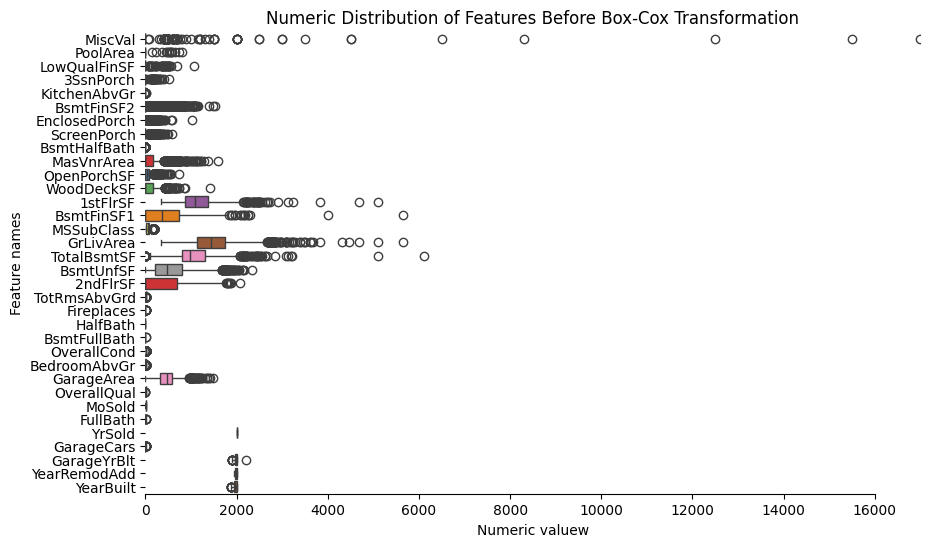

In [144]:
skewnewss_index=list(skew_features.index)
skewnewss_index.remove('LotArea')
all_numeric_df=all_df.loc[:,skewnewss_index]

fig,ax=plt.subplots(figsize=(10,6))
ax.set_xlim(0,all_numeric_df.max().sort_values(ascending=False)[0])
ax=sns.boxplot(data=all_numeric_df[skewnewss_index],orient='h',palette='Set1')
ax.xaxis.grid(False)
ax.set(ylabel='Feature names')
ax.set(xlabel='Numeric valuew')
ax.set(title='Numeric Distribution of Features Before Box-Cox Transformation')

sns.despine(trim=True, left=True)

왜도가 높을수록 Box가 잘 나타나지 않음.

즉, 오른쪽으로 치우친 데이터를 많이 확인할 수 있다

이런 경우 수치형 변수들을 입력 변수로 활용하면 특히 수치형 데이터를 예측해야 하는 시점에서 선형 회귀와 같은 알고리즘을 사용할 때 입력값이 왜곡되어 떨어질 수도 있음

=> 이러한 경우 Box-Coz Transformation을 사용

In [145]:
# from scipy.special import boxcox1p
# from scipy.stats import boxcox_normmax

# high_skew = skew_features[skew_features > 1]
# high_skew_index = high_skew.index

# print("The data before Box-Cox Transformation: \n", all_df[high_skew_index].head())

# for num_var in high_skew_index:
#   all_df[num_var] = boxcox1p(all_df[num_var], boxcox_normmax(all_df[num_var] + 1))

# print("The data after Box-Cox Transformation: \n", all_df[high_skew_index].head())

따라 해보았지만 에러가 나옴

- 상수값이 아닌 경우
- 음수와 0이 있는 경우
- 초기 파라미터를 못찾는 경우

이 세가지의 경우가 있다길래 GPT 돌려 해결

In [146]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import numpy as np

# 왜도가 1 이상인 피처 선택
high_skew = skew_features[skew_features > 1]
high_skew_index = high_skew.index

print('The data before Box-Cox Transformation:\n', all_df[high_skew_index].head())

# Box-Cox 변환 적용
for num_var in high_skew_index:
    if all_df[num_var].nunique() > 1:  # 상수 값이 아닌 경우
        if all_df[num_var].min() < 0:
            print(f"Skipping {num_var} due to negative values. Applying log1p instead.")
            all_df[num_var] = np.log1p(all_df[num_var])
        elif all_df[num_var].min() == 0:
            print(f"Applying Box-Cox transformation to {num_var} with a shift.")
            all_df[num_var] = boxcox1p(all_df[num_var] + 1, boxcox_normmax(all_df[num_var] + 1))
        else:
            print(f"Applying Box-Cox transformation to {num_var}.")
            try:
                all_df[num_var] = boxcox1p(all_df[num_var], boxcox_normmax(all_df[num_var]))
            except Exception as e:
                print(f"Failed to apply Box-Cox transformation to {num_var}. Error: {e}")
    else:
        print(f"Skipping {num_var}, as it contains constant values.")

print('The data after Box-Cox Transformation: \n', all_df[high_skew_index].head())


The data before Box-Cox Transformation:
    MiscVal  PoolArea  LotArea  LowQualFinSF  3SsnPorch  KitchenAbvGr  \
0        0         0     8450             0          0             1   
1        0         0     9600             0          0             1   
2        0         0    11250             0          0             1   
3        0         0     9550             0          0             1   
4        0         0    14260             0          0             1   

   BsmtFinSF2  EnclosedPorch  ScreenPorch  BsmtHalfBath  MasVnrArea  \
0         0.0              0            0           0.0       196.0   
1         0.0              0            0           1.0         0.0   
2         0.0              0            0           0.0       162.0   
3         0.0            272            0           0.0         0.0   
4         0.0              0            0           0.0       350.0   

   OpenPorchSF  WoodDeckSF  1stFlrSF  BsmtFinSF1  MSSubClass  GrLivArea  \
0           61          

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1298: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, prob = _stats_py.pearsonr(xvals, yvals)


Applying Box-Cox transformation to ScreenPorch with a shift.
Applying Box-Cox transformation to BsmtHalfBath with a shift.
Applying Box-Cox transformation to MasVnrArea with a shift.
Applying Box-Cox transformation to OpenPorchSF with a shift.
Applying Box-Cox transformation to WoodDeckSF with a shift.
Applying Box-Cox transformation to 1stFlrSF.
Failed to apply Box-Cox transformation to 1stFlrSF. Error: The algorithm terminated without finding a valid bracket. Consider trying different initial points.
Applying Box-Cox transformation to BsmtFinSF1 with a shift.
Applying Box-Cox transformation to MSSubClass.
Applying Box-Cox transformation to GrLivArea.
Applying Box-Cox transformation to TotalBsmtSF with a shift.
The data after Box-Cox Transformation: 
     MiscVal  PoolArea  LotArea  LowQualFinSF  3SsnPorch  KitchenAbvGr  \
0  0.697311  0.688051     8450       0.67506   0.710274      1.249115   
1  0.697311  0.688051     9600       0.67506   0.710274      1.249115   
2  0.697311  0.688

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1298: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, prob = _stats_py.pearsonr(xvals, yvals)


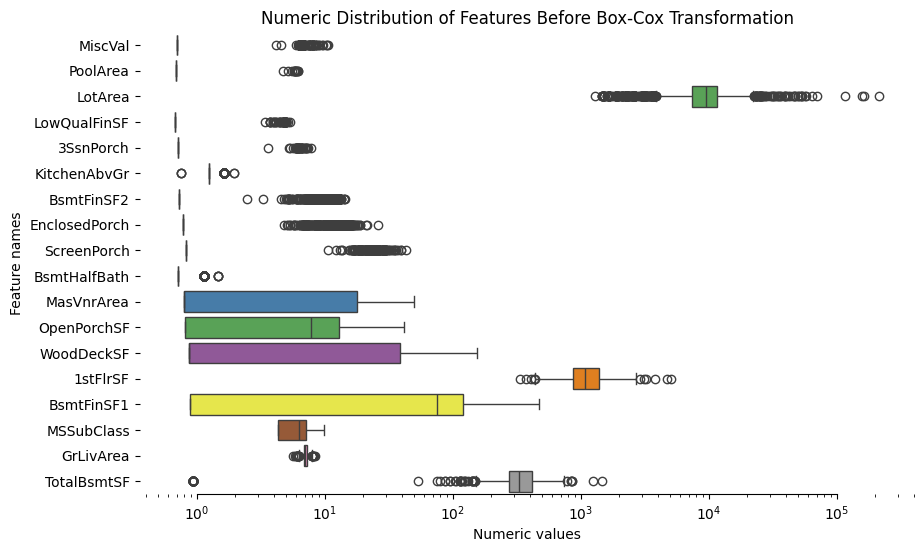

In [147]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xscale('log')
ax = sns.boxplot(data=all_df[high_skew_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features Before Box-Cox Transformation")
sns.despine(trim=True, left=True)

약간 다른 결과가 나왔지만 거의 유사함

### 도출 변수 생성

도출 변수 : 주어진 변수 내에서 새로운 변수를 도출하는 과정
- 여러 변수를 하나로 조합하여 변수의 개수를 줄임
- 차원 축소와는 비슷하지만 다른 개념

In [148]:
#SF : Square Feet(즉, 각 층 마다의 면을 의미함)
#집이 크면 집값이 높으니 합쳐도 상관없음
all_df['TotalSF']=all_df['TotalBsmtSF']+all_df['1stFlrSF']+all_df['2ndFlrSF']

#새로운 변수를 만들었으니 기존 변수를 삭제해줌
all_df.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF'],axis=1)

print(all_df.shape)

(2917, 73)


In [149]:
all_df['Total_Bathrooms']=(all_df['FullBath']+(0.5*all_df['HalfBath'])+all_df['BsmtFullBath']+(0.5*all_df['BsmtHalfBath']))

all_df['Total_porch_sf']=(all_df['OpenPorchSF']+all_df['3SsnPorch']+all_df['EnclosedPorch']+all_df['ScreenPorch'])

all_df=all_df.drop(['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch'],axis=1)

print(all_df.shape)

(2917, 67)


In [150]:
#연도와 관련있는 변수 추출
num_all_vars=list(train.select_dtypes(include=[np.number]))
year_feature=[]
for var in num_all_vars:
  if 'Yr' in var:
    year_feature.append(var)
  elif 'Year' in var:
    year_feature.append(var)
  else:
    print(var,'is not related with Year')
print(year_feature)

MSSubClass is not related with Year
LotFrontage is not related with Year
LotArea is not related with Year
OverallQual is not related with Year
OverallCond is not related with Year
MasVnrArea is not related with Year
BsmtFinSF1 is not related with Year
BsmtFinSF2 is not related with Year
BsmtUnfSF is not related with Year
TotalBsmtSF is not related with Year
1stFlrSF is not related with Year
2ndFlrSF is not related with Year
LowQualFinSF is not related with Year
GrLivArea is not related with Year
BsmtFullBath is not related with Year
BsmtHalfBath is not related with Year
FullBath is not related with Year
HalfBath is not related with Year
BedroomAbvGr is not related with Year
KitchenAbvGr is not related with Year
TotRmsAbvGrd is not related with Year
Fireplaces is not related with Year
GarageCars is not related with Year
GarageArea is not related with Year
WoodDeckSF is not related with Year
OpenPorchSF is not related with Year
EnclosedPorch is not related with Year
3SsnPorch is not rela

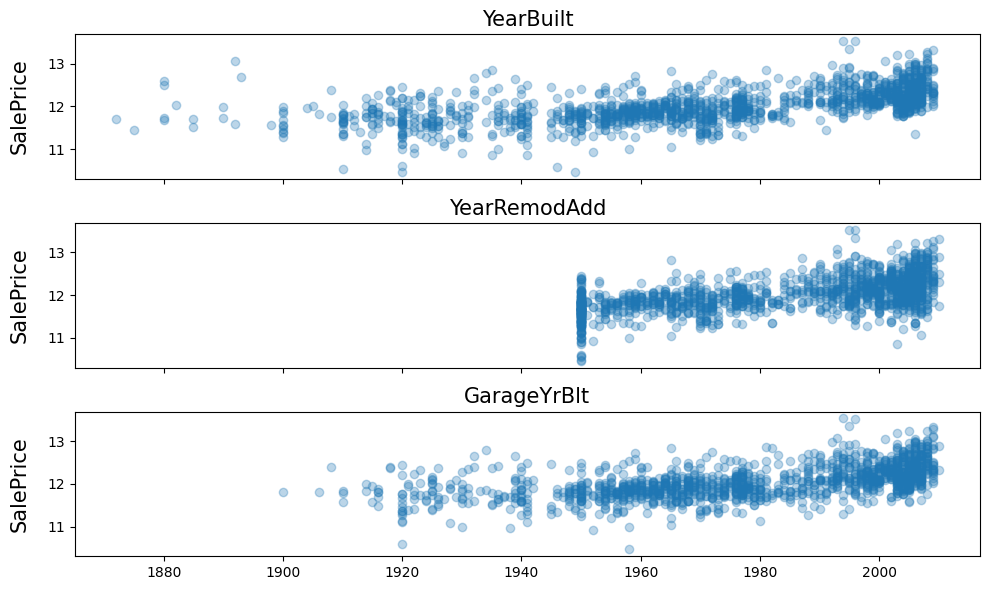

In [151]:
fig,ax=plt.subplots(3,1,figsize=(10,6),sharex=True,sharey=True)
for i, var in enumerate(year_feature):
  if var != 'YrSold':
    ax[i].scatter(train[var],y,alpha=0.3)
    ax[i].set_title('{}'.format(var),size=15)
    ax[i].set_ylabel('SalePrice',size=15,labelpad=12.5)

plt.tight_layout()
plt.show()

2000년대에 올수록 SalePrice의 가격이 모두 우측으로 상향하는 것을 볼 수 있음
- YrSold는 2000년대에 데이터가 몰려있음

In [152]:
all_df=all_df.drop(['YearBuilt','GarageYrBlt'],axis=1)
print(all_df.shape)

(2917, 65)


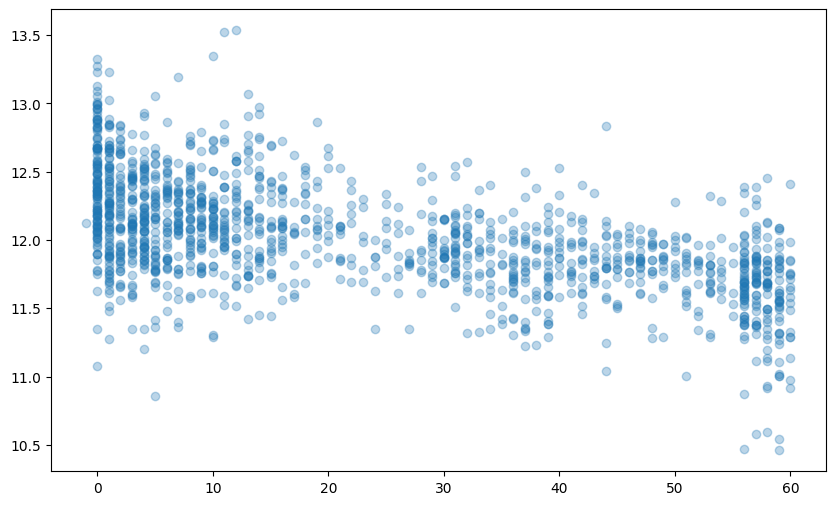

In [153]:
#YrSold와 YearRemodAdd의 연도차이 변수 생성
YearsSinceRemodel=train['YrSold'].astype(int)-train['YearRemodAdd'].astype(int)

fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(YearsSinceRemodel,y,alpha=0.3)
fig.show()

연도차이가 클 수록 SalesPrice가 하향하는 것을 볼 수 있음

In [154]:
all_df['YearsSinceRemodel']=all_df['YrSold'].astype(int)-all_df['YearRemodAdd'].astype(int)
all_df=all_df.drop(['YrSold','YearRemodAdd'],axis=1)
print(all_df.shape)

(2917, 64)


### 더미 변수의 응용

더미변환: 범주형 데이터를 수치형으로 변환하는 작업

In [155]:
all_df['PoolArea'].value_counts()

,count
PoolArea,
0.688051,2904
5.844720,1
6.049707,1
5.947321,1
5.914992,1
5.788412,1
5.856560,1
6.162505,1
4.728009,1


In [156]:
def count_dummy(x):
  if x>=1:
    return 1
  else:
    return 0
all_df['PoolArea']=all_df['PoolArea'].apply(count_dummy)
all_df['PoolArea'].value_counts()

,count
PoolArea,
0,2904
1,13


In [157]:
all_df['GarageArea']=all_df['GarageArea'].apply(count_dummy)
all_df['GarageArea'].value_counts()

,count
GarageArea,
1,2760
0,157


In [158]:
all_df['Fireplaces']=all_df['Fireplaces'].apply(count_dummy)
all_df['Fireplaces'].value_counts()

,count
Fireplaces,
1,1497
0,1420


### Label Encoding, Ordinal Encoding, One-Hot ENcoding

더미변환은 값이 두개일 때 주로사용

Label ENcoding, Ordinal Encoding, One-Hot Encoding은 값이 3개 이상일 떄 사용

Label Encoding: 문자열 데이터를 각 범주의 개수에 따라 숫자로 변환하는 작업

One-Hot Encoding: 각 값을 변수로 변환해 1과 0으로 변환

OrdinalEncoding: 입력하는 형태를 배열로 바꾸고, 반환값의 형태로 정수형이 아닌 실수형으로 출력(Label Encoding과 유사함)

In [159]:
#LabelEncoder 예시
from sklearn.preprocessing import LabelEncoder
import pandas as pd

temp=pd.DataFrame({'Food_Name': ['Apple','Chicken','Broccoli'],
                   'Calories':[95,231,50]})
encoder=LabelEncoder()
encoder.fit(temp['Food_Name'])
labels=encoder.transform(temp['Food_Name'])
print(list(temp['Food_Name']),'=>',labels)

['Apple', 'Chicken', 'Broccoli'] => [0 2 1]


In [160]:
#OrdinalEncoding 예시
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

temp=pd.DataFrame({'Food_Name':['Apple','Chicken','Broccoli'],
                   'Calories':[95,231,50]
})
encoder=OrdinalEncoder()
print(list(temp['Food_Name']),'=>',labels.tolist())

['Apple', 'Chicken', 'Broccoli'] => [0, 2, 1]


In [161]:
#One-Hot Encoding 예시
import pandas as pd

temp=pd.DataFrame({'Food_Name':['Apple','Chicken','Broccoli'],
                   'Calories':[95,231,50]})
temp=pd.get_dummies(temp)
print(temp)
print(temp.shape)

   Calories  Food_Name_Apple  Food_Name_Broccoli  Food_Name_Chicken
0        95             True               False              False
1       231            False               False               True
2        50            False                True              False
(3, 4)


|기법|대상 데이터|공식 문서 설명|
|------|---|---|
| LabelEncoder | 종속 변수(y) | 0과 n_classe-1 사이의 값으로 대상 레이블을 인코딩, x가 아니라 y를 인코딩하는데 사용 |
|OneHotEncoder| 독립변수(X) | 범주형 변수를 0과 1의 정수 배열로 인코딩 |
|OrdinalEncoder | 독립 변수(X) | 범주형 변수를 정수로 인코딩 |

범주형 변수
- 서열 척도: ordinalencoder을 쓰는 것이 합리적
- 하지만, 데이터는 인식을 못함
- 가독성이 좋은 Pandas를 사용하는 것이 좋아보임
- 명목 척도: onehotencoding을 쓰는 것이 합리적
- 범주가 많으면 차원의 저주에 걸림

One-Hot Encoding
- 선형 회귀, 로지스틱 회귀 분석, Support Vector Machine과 같은 Non-Tree 기반 알고리즘에서 사용

Ordinal Encoding
- 의사 결정 나무, 랜덤 포레스트 같은 Tree 기반 알고리즘에 사용

모든 데이터에서 이런 것은 않아 다양한 모형을 학습한 후 비교해서 결정

In [162]:
#본 데이터에 One-Hot Encoding 적용
all_df=pd.get_dummies(all_df).reset_index(drop=True)
all_df.shape

(2917, 257)

### 정리

머신러닝 전체과정 중 피처 엔지니어링이 가장 어려움
- 데이터 수집부터, 주어진 데이터로 어떤 변수를 살리고 버릴지 신중하게 고민하면서 작업해야함
- 시각화에 노력을 해야함(필사라 실제보단 적게 진행함)

## 머신러닝 모형 학습 및 평가

In [163]:
#합친 데이터를 다시 분리
X=all_df.iloc[:len(y),:]
X_test=all_df.iloc[len(y):,:]
X.shape, y.shape, X_test.shape

((1458, 257), (1458,), (1459, 257))

In [164]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1093, 257), (365, 257), (1093,), (365,))

### Train, Validation, Test

Cross Validation : 훈련데이터와 검증 데이터, 테스트 데이터를 나누어 진행
- 훈련 데이터 : 머신러닝 모형을 만들 때 사용하는 데이터
- 검증 데이터 : 훈련 데이터에서 일부 빼내어 머신러닝이 모델을 잘 예측하는지 성능을 평가하는 데이터
- 테스트 데이터: 선정된 최종 모델을 적용하고 최종 평가를 내림

### 교차 검증

훈련 데이터에서 일부 빼내어 검증 데이터를 만드는 과정
- 한 번만 모형을 학습해 테스트할 떄는 데이터 편향이 생길 수 있음
- 왜곡도 생길 수 있음

이러한 것을 방지하도록 3-Fold(4-Fold) 교차 검증 사용
- 훈련 데이터와 검증 데이터를 나누는 방법을 3(4)가지로 진행하겠다는 의미

In [165]:
from sklearn.model_selection import KFold

cv=KFold(n_splits=5, random_state=42, shuffle=True)

### 회귀 모형 평가 지표

In [166]:
#MAE
import numpy as np

def mean_absolute_error(y_true,y_pred):
  error=0
  for yt,yp in zip(y_true,y_pred):
    error=error+np.abs(yt-yp)
    mae=error/len(y_true)
  return mae

In [167]:
#MSE
import numpy as np

def mean_squared_error(y_true, y_pred):
  error=0
  for yt,yp in zip(y_true,y_pred):
    error=error+(yt-yp)**2

  mse=error/len(y_true)
  return mse

In [168]:
#RMSE
import numpy as np

def root_rmse_squared_error(y_true,y_pred):
  error=0

  for yt,yp in zip(y_true,y_pred):
    error=error+(yt-yp)**2

  mse=error/len(y_true)
  rmse=np.round(np.sqrt(mse),3)
  return rmse

In [169]:
y_true=[400,300,800]
y_pred=[380,320,777]

print('MAE:',mean_absolute_error(y_true,y_pred))
print('MSE:',mean_squared_error(y_true,y_pred))
print('RMSE:',root_rmse_squared_error(y_true,y_pred))

MAE: 21.0
MSE: 443.0
RMSE: 21.048


오차의 값이 작을수록 좋은 모형
- 오차가 클수록 RMSE 값이 크게 흔들림

In [170]:
y_true=[400,300,800,900]
y_pred=[380,320,777,600]

print('MAE:',mean_absolute_error(y_true,y_pred))
print('MSE:',mean_squared_error(y_true,y_pred))
print('RMSE:',root_rmse_squared_error(y_true,y_pred))

MAE: 90.75
MSE: 22832.25
RMSE: 151.103


In [171]:
from sklearn.metrics import mean_squared_error

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

MAE의 상승폭보다 MSE의 상승폭이 커 직관적으로 확인 가능한 RMSE를 일반적으로 사용함

### 모형 정의, 학습, 검증 평가

| Metric | Scoring | Function |
|------|---|---|
| MAE | 'neg_mean_absolute_error' | metrics.mean_absolute_error |
| MSE | 'neg_mean_squared_error' | metrics.mean_squared_error |
| MSLE | 'neg_mean_squared_log_error' | metrics.mean_squared_log_error |
| R**2 | 'r2' | metrics.r2_score |
| MAPE | 'neg_mean_absolute_percentage_error' | metrics.mean_absolute_percentage_error |

In [172]:
# cv_rmse: RMSE를 학인하는 함수
#각각의 RMSE를 List로 반환받은 뒤 딕셔너리 rmse_scores에 입력
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

def cv_rmse(model, n_folds=5):
    cv = KFold(n_splits=n_folds, random_state=42, shuffle=True)
    rmse_list = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv))
    print('CV RMSE value list:', np.round(rmse_list, 4))
    print('CV RMSE mean value:', np.round(np.mean(rmse_list), 4))
    return (rmse_list)

n_folds = 5
rmse_scores = {}
lr_model = LinearRegression()

score = cv_rmse(lr_model, n_folds)
print("linear regression - mean: {:.4f} (std: {:.4f})".format(score.mean(), score.std()))
rmse_scores['linear regression'] = (score.mean(), score.std())

CV RMSE value list: [1.265910e+01 1.800000e-01 6.471338e+02 4.722451e+02 4.643169e+02]
CV RMSE mean value: 319.307
linear regression - mean: 319.3070 (std: 263.7284)


### 첫 번째 최종 예측값 제출

In [173]:
from sklearn.model_selection import cross_val_predict

X = all_df.iloc[:len(y), :]
X_test = all_df.iloc[len(y):, :]
X.shape, y.shape, X_test.shape

#학습 데이터를 lr_model에 저장
lr_model_fit = lr_model.fit(X, y)
#SalePrice를 피처엔지니어링에서 로그 치환하여 원래 값으로 변환한 후, 소수점 이하는 표시하지 않도록 floor사용
final_preds = np.floor(np.expm1(lr_model_fit.predict(X_test)))
print(final_preds)

[113365. 155836. 184764. ... 171312. 113278. 223038.]


In [174]:
submission = pd.read_csv("sample_submission.csv")
submission.iloc[:,1] = final_preds
print(submission.head())
submission.to_csv("The_first_regression.csv", index=False)

     Id  SalePrice
0  1461   113365.0
1  1462   155836.0
2  1463   184764.0
3  1464   197548.0
4  1465   199701.0


### 모형 알고리즘 추가

Decision Tree, Random Forest, GBM 모형을 추가해 기존의 선형 모델까지 비교

In [175]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

#LinearRegression
lr_model=LinearRegression()

#Tree Decision
tree_model=DecisionTreeRegressor()

#Random Forest Regressor
rf_model=RandomForestRegressor()

#Gradient Boosting Regressor
gbr_model=GradientBoostingRegressor()

In [176]:
score=cv_rmse(tree_model,n_folds)
print('Decision Tree Regressor-mean: {:.4f} (std: {:4f})'.format(score.mean(),score.std()))
rmse_scores['Decision Tree Regressor']=(score.mean(),score.std())

CV RMSE value list: [0.2156 0.2209 0.2186 0.2058 0.191 ]
CV RMSE mean value: 0.2104
Decision Tree Regressor-mean: 0.2104 (std: 0.010970)


In [177]:
score=cv_rmse(rf_model,n_folds)
print('RandomForest Regressor-mean: {:.4f} (std: {:.4f})'.format(score.mean(),score.std()))
rmse_scores['RandomForest Regressior']=(score.mean(),score.std())

CV RMSE value list: [0.1497 0.1551 0.1447 0.1307 0.1242]
CV RMSE mean value: 0.1409
RandomForest Regressor-mean: 0.1409 (std: 0.0116)


In [178]:
score=cv_rmse(gbr_model,n_folds)
print('Gradient Boosting Regressor-mean: {:.4f} (std: {:.4f})'.format(score.mean(),score.std()))
rmse_scores['Gradient Boosting Regressor']=(score.mean(),score.std())

CV RMSE value list: [0.1355 0.1397 0.1347 0.1155 0.1138]
CV RMSE mean value: 0.1278
Gradient Boosting Regressor-mean: 0.1278 (std: 0.0109)


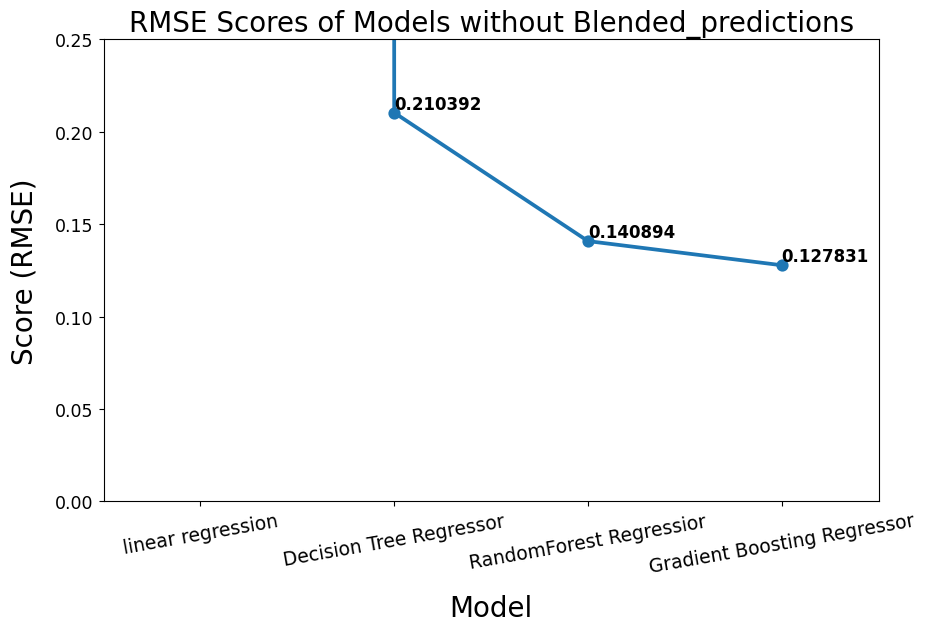

In [184]:
fig,ax=plt.subplots(figsize=(10,6))
ax = sns.pointplot(x=list(rmse_scores.keys()), y=[score[0] for score in rmse_scores.values()],
                   markers='o', linestyle='-', ax=ax)

for i, (model, score) in enumerate(rmse_scores.items()):
    if model != 'linear regression':
        ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left',
                size='large', color='black', weight='semibold')

ax.set_ylabel('Score (RMSE)', size=20, labelpad=12.5)
ax.set_xlabel('Model', size=20, labelpad=12.5)
ax.tick_params(axis='x', labelsize=13.5, rotation=10)
ax.tick_params(axis='y', labelsize=12.5)
ax.set_ylim(0, 0.25)
ax.set_title('RMSE Scores of Models without Blended_predictions', size=20)

plt.show()

데이터가 약간 다른지 linear regression이 너무 높게 나와 제외하고 그래프로 표현함

4개의 모형에 가중치를 주어 Blending함

In [186]:
lr_model_fit=lr_model.fit(X,y)
tree_model_fit=tree_model.fit(X,y)
rf_model_fit=rf_model.fit(X,y)
gbr_model_fit=gbr_model.fit(X,y)

def blended_learning_predictions(X):
  blended_score=(0.3*lr_model_fit.predict(X))+\
  (0.1*tree_model_fit.predict(X))+\
  (0.3*gbr_model_fit.predict(X))+\
  (0.3*rf_model_fit.predict(X))
  return blended_score

In [187]:
blended_score=rmsle(y,blended_learning_predictions(X))
rmse_scores['blended']=(blended_score,0)
print('RmSLE score on train data:')
print(blended_score)

RmSLE score on train data:
0.06179453603721498


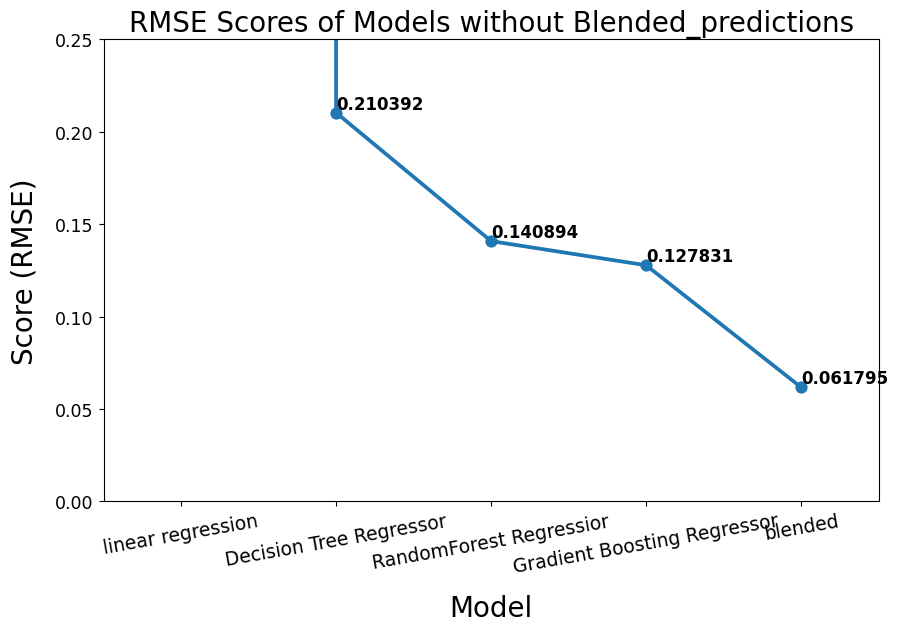

In [188]:
fig,ax=plt.subplots(figsize=(10,6))
ax = sns.pointplot(x=list(rmse_scores.keys()), y=[score[0] for score in rmse_scores.values()],
                   markers='o', linestyle='-', ax=ax)

for i, (model, score) in enumerate(rmse_scores.items()):
    if model != 'linear regression':
        ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left',
                size='large', color='black', weight='semibold')

ax.set_ylabel('Score (RMSE)', size=20, labelpad=12.5)
ax.set_xlabel('Model', size=20, labelpad=12.5)
ax.tick_params(axis='x', labelsize=13.5, rotation=10)
ax.tick_params(axis='y', labelsize=12.5)
ax.set_ylim(0, 0.25)
ax.set_title('RMSE Scores of Models without Blended_predictions', size=20)

plt.show()

최종모형 제출

In [190]:
submission.iloc[:,1]=np.floor(np.expm1(blended_learning_predictions(X_test)))
submission.to_csv('The_second_regression.csv',index=False)